# 划分数据集

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data',header=None)
df_wine.columns = ['Class label','Alcohol',
                  'Malic acid','Ash',
                  'Alcalinity of ash', 'Magnesium',
                  'Total phenols', 'Flavanoids',
                  'Nonflavanoid phenols',
                  'Proanthocyanins',
                  'Color intensity', 'Hue',
                  'OD280/OD315 of diluted wines',
                  'Proline'] #设置列标题
X,y = df_wine.iloc[:,1:].values,df_wine.iloc[:,0].values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [2]:
print('Class labels',np.unique(df_wine['Class label'])) #查看类标数量

Class labels [1 2 3]


In [3]:
df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


# 特征缩放

In [4]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler() #特征归一化0~1，特征标准化-1~1，一般来说标准化呈正态分布，更新权重更方便
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)
X_train_norm[0:3]

array([[0.43947368, 0.62605042, 0.45751634, 0.62765957, 0.38271605,
        0.63793103, 0.46624473, 0.6       , 0.60392157, 0.13961039,
        0.55555556, 0.68131868, 0.12446043],
       [1.        , 0.15756303, 0.30718954, 0.14893617, 0.33333333,
        0.62758621, 0.55696203, 0.32      , 0.61568627, 0.42424242,
        0.46153846, 0.57875458, 0.54316547],
       [0.47105263, 0.5210084 , 0.39215686, 0.44148936, 0.22222222,
        0.17241379, 0.06751055, 0.54      , 0.21960784, 0.97186147,
        0.15384615, 0.17582418, 0.28417266]])

In [5]:
X_train_std[:3]

array([[-0.30917995,  1.34742046,  0.13453501,  1.08847985,  0.1393234 ,
         0.87493823,  0.51935417,  0.56895531,  0.68614127, -1.08162528,
         1.01634464,  0.65368149, -0.92520182],
       [ 2.29230484, -0.61079001, -0.73749647, -1.60735573, -0.15225638,
         0.82740252,  0.9420032 , -0.57954053,  0.74371956,  0.13922281,
         0.52551682,  0.26822257,  0.9705412 ],
       [-0.16261742,  0.90835982, -0.24460911,  0.04009935, -0.80831088,
        -1.26416882, -1.33833575,  0.32284906, -1.19474949,  2.48807883,
        -1.08082876, -1.24608034, -0.20208335]])

# 特征选择

### L1正则化满足数据稀疏化

In [6]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty='l1',C=1.0,multi_class='auto',solver='liblinear')
lr.fit(X_train_std,y_train)
print ('Training accuracy:',lr.score(X_train_std,y_train))
print ('test accuracy:',lr.score(X_test_std,y_test))
print (lr.intercept_) #获得截距项
print (lr.coef_) #获得权重系数，有三个权重是针对多分类的情况所采用的一对多方法OvR

Training accuracy: 1.0
test accuracy: 0.9444444444444444
[-1.22514205 -1.32134622 -2.17050875]
[[ 1.54186704  0.05595697  0.71758883 -1.37105573  0.          0.
   0.67811555  0.          0.          0.          0.          1.08013881
   2.09702173]
 [-2.09850141 -0.40034986 -0.69634101  0.36502807  0.          0.
   0.22192745  0.          0.37078983 -1.83939632  1.20696441  0.
  -1.69059373]
 [ 0.          0.34205184  0.11706288  0.          0.          0.
  -1.82716512  0.          0.          1.96430408 -0.79892977 -1.03224177
   0.        ]]


### 正则化效果图（暂略）

### 特征选择算法

SBS (暂略) 详见 ForestDemo.py 之L1特征选择

In [7]:
from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.metrics import accuracy_score

# 主成分分析

##  方差贡献率

In [8]:
cov_mat = np.cov(X_train_std.T)#获取协方差
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)#计算矩阵的特征值和右特征向量
print ('\nEigenvalues \n%s' % eigen_vals)


Eigenvalues 
[5.01721931 2.48094447 1.47195967 0.92743321 0.7745982  0.57824877
 0.46945398 0.0845935  0.37548243 0.15285913 0.23404614 0.24690277
 0.29194948]


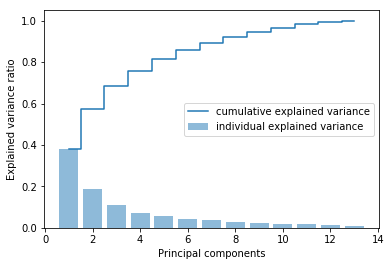

In [9]:
tot = sum(eigen_vals)
var_exp = [(i/tot)
          for i in sorted(eigen_vals,reverse=True)]
cum_var_exp = np.cumsum(var_exp)#按照所给定的轴参数返回元素的梯形累计和

plt.bar(range(1,14),var_exp, alpha=0.5,align='center',
       label = 'individual explained variance')#柱状图
plt.step(range(1,14),cum_var_exp,where='mid',
        label = 'cumulative explained variance')#绘制步进图
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()

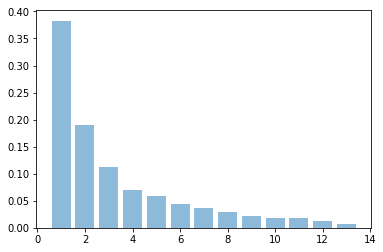

In [10]:
'''sklearn实现主成分分析重要性分布'''
from sklearn.decomposition import PCA
pca_nc = PCA()
pca_nc.fit(X_train_std)
var_skn=pca_nc.explained_variance_ratio_.tolist()
plt.bar(range(1,14),var_skn, alpha=0.5,align='center',
       label = 'individual explained variance')#柱状图
plt.show()

## 特征转换

In [15]:
eigen_pairs = [(np.abs(eigen_vals[i]),eigen_vecs[:,i])
              for i in range(len(eigen_vals))]
eigen_pairs.sort(reverse=True)
w = np.hstack((eigen_pairs[0][1][:,np.newaxis],
              eigen_pairs[1][1][:,np.newaxis]))#hstack 水平堆叠矩阵
print('Matrix W:\n',w[:5])
X_train_std[0].dot(w)

Matrix W:
 [[ 0.15644649 -0.49485271]
 [-0.27664999 -0.23159998]
 [-0.01881291 -0.24070145]
 [-0.22549651  0.13386138]
 [ 0.1233472  -0.27337336]]


array([0.34923299, 1.1521568 ])

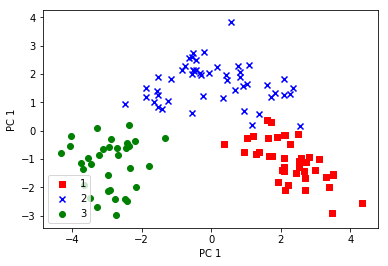

In [17]:
X_train_pca = X_train_std.dot(w)
colors=['r','b','g']
markers = ['s','x','o']
for l,c,m in zip(np.unique(y_train),colors,markers):
    plt.scatter(X_train_pca[y_train == l, 0],
               X_train_pca[y_train == l, 1],
               c=c ,label=l,marker=m)
plt.xlabel('PC 1')
plt.ylabel('PC 1')
plt.legend(loc='lower left')
plt.show()